In [24]:
# a. Import necessary packages
import tensorflow as tf
from tensorflow.keras import layers,models
from keras.utils import to_categorical

In [25]:
# b. Load the training and testing data
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [26]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [27]:
# c. Define the network architecture using Keras
model=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
# d. Train the model using SGD/Adam optimizer
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.2637 - loss: 2.0180 - val_accuracy: 0.3701 - val_loss: 1.7768
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3759 - loss: 1.7400 - val_accuracy: 0.4167 - val_loss: 1.6370
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4180 - loss: 1.6384 - val_accuracy: 0.3950 - val_loss: 1.6461
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4362 - loss: 1.5775 - val_accuracy: 0.4579 - val_loss: 1.5229
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4590 - loss: 1.5200 - val_accuracy: 0.4084 - val_loss: 1.7510
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4690 - loss: 1.4892 - val_accuracy: 0.4555 - val_loss: 1.5256
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4874 - loss: 1.4396 - val_accuracy: 0.4728 - val_loss: 1.4939
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4972 - loss: 1

In [30]:
# e. Evaluate the network
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Test accuracy:',test_acc)
print('Test Loss:',test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4819 - loss: 1.4699
Test accuracy: 0.4781999886035919
Test Loss: 1.474753737449646


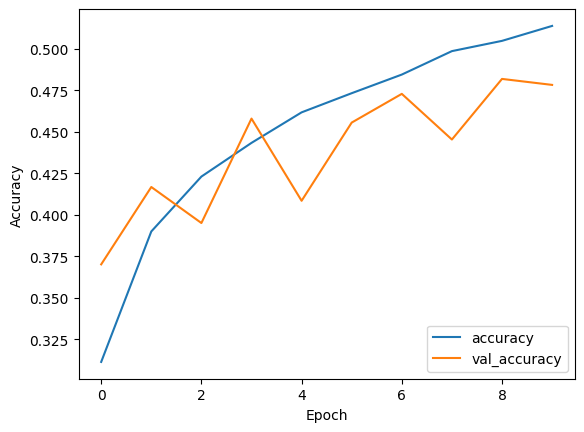

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

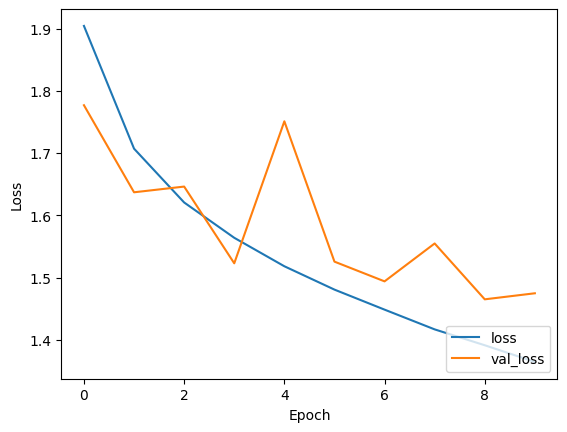

In [37]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()